# Aufgabe 1

## Importe

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
from mlxtend.data import loadlocal_mnist

# Imports for a keras tensorflow model
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K

## Variablen

In [14]:
epochs = 20
batch_size = 128
sgd = SGD(0.01)

## a) Preparing Dataset (MNIST/Tensorflow)

### Get dataset and prepare train and test sets

In [15]:
# Grab the MNIST dataset, it has already training and testing data
print("[INFO] accessing MNIST...")
((trainX, trainY), (testX, testY)) = mnist.load_data()

# Each image in the MNIST dataset is represented as a 28x28x1, this needs to be flattened to be used by the ffnn
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))

# Scale data to the range of [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

[INFO] accessing MNIST...


In [16]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

print(trainY)


(60000, 784)
(60000,)
(10000, 784)
(10000,)
[5 0 4 ... 5 6 8]


### Encode data

In [17]:
# One-hot-encoding
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

print(trainY)

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


## b) Feed forward network

In [18]:
activation_functions = ["relu","sigmoid","tanh", "softplus", "softsign", "selu", "elu"] 
# softmax and exponential activation functions are not working in this setup therefore they are not included in this list

In [19]:
# define the 784-256-128-10 architecture with the different activations using Keras
models = []
for ac in activation_functions:
    print(f"Building model with {ac} as activation function")
    model = Sequential()
    model.add(Dense(256, input_shape=(784,), activation=ac))
    model.add(Dense(128, activation=ac))
    model.add(Dense(10, activation="softmax"))
    models.append((model, ac, _))

Building model with relu as activation function
Building model with sigmoid as activation function
Building model with tanh as activation function
Building model with softplus as activation function
Building model with softsign as activation function
Building model with selu as activation function
Building model with elu as activation function


In [20]:
# Train with SGD, Gradient descent (with momentum) optimizer
print("[INFO] training networks...")
for i in range(len(models)):
    model, activation, _ = models[i]
    print(f"\n[Info] {activation = }")
    model.compile(loss="categorical_crossentropy", optimizer=sgd,
        metrics=["accuracy"])
    H = model.fit(trainX, trainY, validation_data=(testX, testY),
        epochs=epochs, batch_size=batch_size)
    models[i] = (model, activation, H)

[INFO] training networks...

[Info] activation = 'relu'
Epoch 1/20
469/469 [==============================] - 1s 1ms/step - loss: 1.1493 - accuracy: 0.7160 - val_loss: 0.5501 - val_accuracy: 0.8621
Epoch 2/20
469/469 [==============================] - 1s 1ms/step - loss: 0.4709 - accuracy: 0.8769 - val_loss: 0.3858 - val_accuracy: 0.8953
Epoch 3/20
469/469 [==============================] - 1s 1ms/step - loss: 0.3710 - accuracy: 0.8971 - val_loss: 0.3302 - val_accuracy: 0.9086
Epoch 4/20
469/469 [==============================] - 1s 1ms/step - loss: 0.3269 - accuracy: 0.9076 - val_loss: 0.2966 - val_accuracy: 0.9172
Epoch 5/20
469/469 [==============================] - 1s 1ms/step - loss: 0.2995 - accuracy: 0.9153 - val_loss: 0.2788 - val_accuracy: 0.9222
Epoch 6/20
469/469 [==============================] - 1s 1ms/step - loss: 0.2794 - accuracy: 0.9204 - val_loss: 0.2613 - val_accuracy: 0.9262
Epoch 7/20
469/469 [==============================] - 1s 1ms/step - loss: 0.2634 - accuracy:

## c) Evaluation

In [21]:
def plot_trainingAccLoss(H):
    # plot the training accuracy
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.show()

    # plot the training loss

    plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
    plt.title("Training Loss")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()


[INFO] evaluating network...

[Info] activation = 'relu'
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.97      0.98      0.98      1135
           2       0.97      0.94      0.95      1032
           3       0.94      0.96      0.95      1010
           4       0.94      0.96      0.95       982
           5       0.95      0.92      0.94       892
           6       0.96      0.96      0.96       958
           7       0.96      0.94      0.95      1028
           8       0.93      0.94      0.94       974
           9       0.95      0.93      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



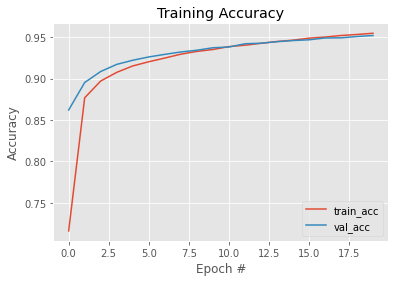

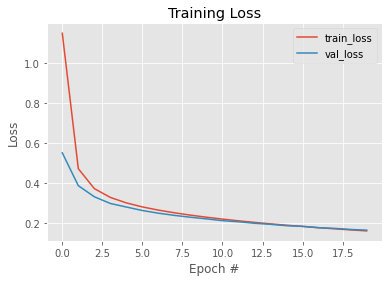


[Info] activation = 'sigmoid'
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       980
           1       0.92      0.98      0.95      1135
           2       0.89      0.85      0.87      1032
           3       0.86      0.87      0.87      1010
           4       0.84      0.90      0.87       982
           5       0.84      0.75      0.80       892
           6       0.89      0.92      0.90       958
           7       0.89      0.88      0.89      1028
           8       0.84      0.82      0.83       974
           9       0.86      0.80      0.83      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.88      0.88     10000



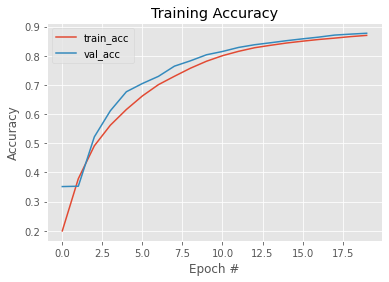

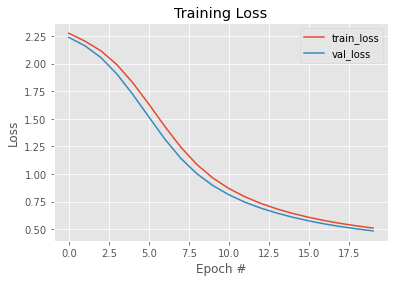


[Info] activation = 'tanh'
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.94      0.93      0.93      1032
           3       0.93      0.94      0.93      1010
           4       0.93      0.95      0.94       982
           5       0.94      0.90      0.92       892
           6       0.94      0.96      0.95       958
           7       0.95      0.93      0.94      1028
           8       0.91      0.92      0.92       974
           9       0.94      0.92      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



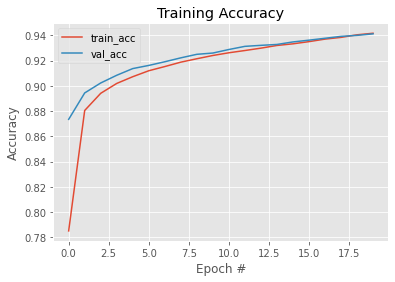

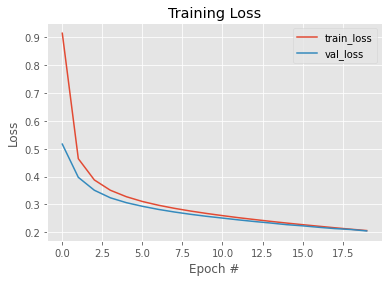


[Info] activation = 'softplus'
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.94      0.99      0.96      1135
           2       0.95      0.88      0.91      1032
           3       0.92      0.91      0.91      1010
           4       0.91      0.94      0.93       982
           5       0.87      0.89      0.88       892
           6       0.92      0.95      0.94       958
           7       0.92      0.94      0.93      1028
           8       0.90      0.86      0.88       974
           9       0.93      0.88      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



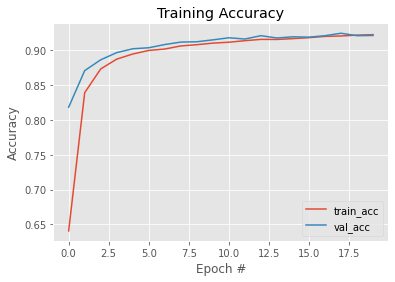

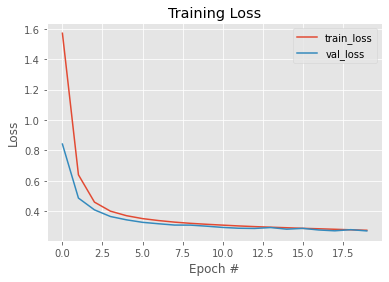


[Info] activation = 'softsign'
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.98      0.98      1135
           2       0.93      0.91      0.92      1032
           3       0.92      0.92      0.92      1010
           4       0.93      0.93      0.93       982
           5       0.92      0.88      0.90       892
           6       0.94      0.95      0.94       958
           7       0.94      0.93      0.94      1028
           8       0.90      0.91      0.91       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



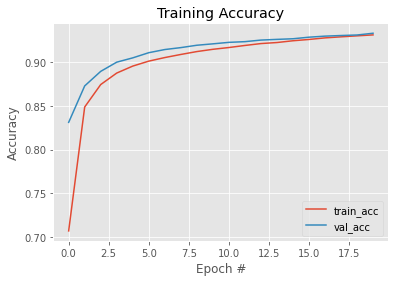

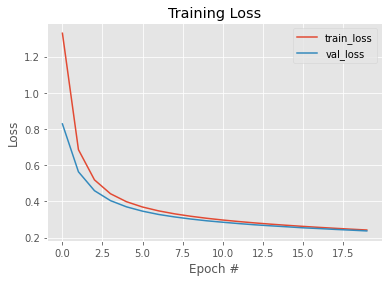


[Info] activation = 'selu'
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.95      0.92      0.94      1032
           3       0.92      0.94      0.93      1010
           4       0.93      0.95      0.94       982
           5       0.93      0.91      0.92       892
           6       0.95      0.95      0.95       958
           7       0.95      0.93      0.94      1028
           8       0.92      0.93      0.93       974
           9       0.93      0.92      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



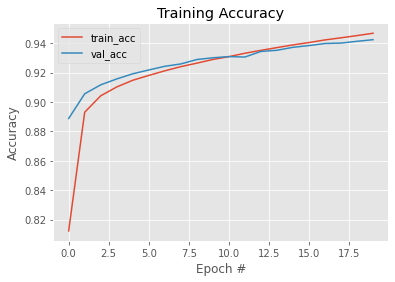

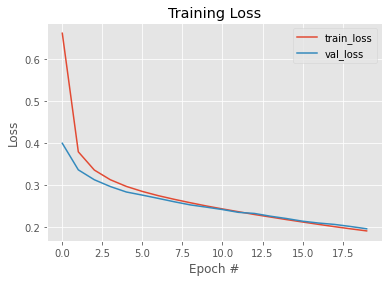


[Info] activation = 'elu'
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.94      0.93      0.93      1032
           3       0.93      0.92      0.93      1010
           4       0.94      0.94      0.94       982
           5       0.93      0.90      0.92       892
           6       0.95      0.96      0.95       958
           7       0.95      0.93      0.94      1028
           8       0.91      0.93      0.92       974
           9       0.93      0.92      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



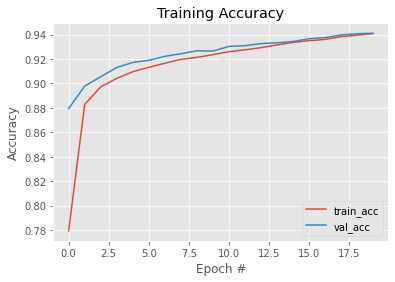

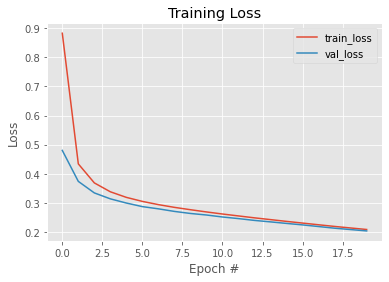

In [22]:
print("[INFO] evaluating network...")
for model, activation, H in models:
    print(f"\n[Info] {activation = }")
    predictions = model.predict(testX, batch_size=batch_size)
    print(classification_report(testY.argmax(axis=1),
	    predictions.argmax(axis=1),
	    target_names=[str(x) for x in lb.classes_]))
    plot_trainingAccLoss(H)

## d) Trend in train and test accuracies over the epochs

In den Plots für die verschiedenen Aktivierungsfunktionen ist zu erkenne, dass die Accuracy sowohl für die Trainings- als auch für die Testdaten mit jeder Epoche verbessert wird. Weiterhin ist sichtbar, dass die beiden Werte der Datensätz sich meist annähern und einen sehr ähnlichen Kurvenverlauf haben.

## e) How can you measure the complexity of an ANN?

Die Berechnungskosten einer ANN steigen linear mit der Anzahl der Schichten und quadratisch zu der Anzahl der Neuronen der einzelnen Schichten. 

## f) What is overfitting? Explain it briefly.

Overfitting bedeutet, dass ein Vorhersagemodell zu stark mit einem Datensatz trainiert wurde, dass es die Ungenauigkeiten/Streuung modeliert und somit für unbekannte Daten nicht die zu grundeliegende Funktion gut approximiern kann.

## g) Increasing complexity

Hier soll die Anzahl der Schichten und deren Einfluss betrachtet werden

In [25]:
def getLayerSize(layer_number: int):
    return 128
    # Constant at the moment
    assert layer_number > 0
    if layer_number < 5:
        return 2**(8-layer_number)
    else:
        return 16


In [27]:
def buildModel(numHiddenLayers: int, ac):
    model = Sequential()
    model.add(Dense(256, input_shape=(784,), activation=ac))
    for i in range(numHiddenLayers):
        model.add(Dense(getLayerSize(i), activation= ac))
    model.add(Dense(10, activation="softmax"))
    return model

In [ ]:
max_hidden_layers = 10
def increaseLayers(ac = "sigmoid"):
    histories = []
    for i in range(max_hidden_layers):
        model = buildModel(i, ac)
        model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
        H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=epochs, batch_size=batch_size, verbose=2)
        histories.append((H, i))
    return histories

In [ ]:
def plotHistory(histories):
    plt.style.use("ggplot")
    plt.figure()
    for history, rep in histories:
        plt.plot(np.arange(0, epochs), history.history["accuracy"], label="train_acc" + str(rep))
        plt.plot(np.arange(0, epochs), history.history["val_accuracy"], label="val_acc" + str(rep))
    plt.title("Training Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.legend()
    #plt.savefig(args["output"])
    plt.show()